### <font style='font-family:sans-serif' color='blue'>Flight Ticket Prediction</font>

<p style="color:blue">Team Members:</p>
<ul>Haritha Kolli</ul>
<ul>Pramodh Athota</ul>
<ul>Naga Sirisha Ponnaganti</ul>
<ul>Yashwanth</ul>

In [1]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

In [2]:
file_path = 'Clean_Dataset.csv'

### <font color='blue'>Analysing the Raw Datasets - Economy, business</font>

#### <font color='blue'>Pre-Processing the DataSets</font>

In [3]:
#Reading the 'business.csv' class dataset
business_df = pd.read_csv('business.csv')

#Creating a class column - with value 'business'
business_df['class'] = 'business'

print(business_df.shape)

business_df.head(3)

(93487, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business


In [4]:
#Reading the 'economy.csv' class data
economy_df = pd.read_csv('economy.csv')

#Creating a class column - with value 'economy'
economy_df['class'] = 'economy'

print(economy_df.shape)

economy_df.head(3)

(206774, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy


In [5]:
#Concating the two datasets - 'economy' and 'business'
data_df = pd.concat([business_df, economy_df],ignore_index=True)

print(data_df.shape)

data_df.head(3)

(300261, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business


In [6]:
#DataFrame data_df information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


#### <font color='blue'>Data Cleaning</font>

In [7]:
def null_check(df):
    null_df = round(df.isnull().sum()/len(df)*100,2)
    print("Total Null value in the dataset: ",round(null_df.mean(),2))
    
null_check(data_df)

Total Null value in the dataset:  0.0


#### <font color='mustard'>1.Handle Datatypes and generating new features</font>

In [8]:
def Datetime_Features(df,column):
    #Handling the 'date' feature
    df[column] = df[column].astype('datetime64[ns]')

    #extracting the new features from the 'date' feature

    df['Weekday'] = df['date'].dt.strftime('%A')
    df['Month'] = df['date'].dt.month
    df['Year'] = df['date'].dt.year
    
    return df


data_df = Datetime_Features(data_df,'date')

In [9]:
def get_price(df,column):
    
    #Handling the price
    df[column] = df[column].apply(lambda x: float(x.replace(',','')))

    return df


data_df = get_price(data_df,'price')

In [10]:
def get_stops(df,column):
    #Number of stops 
    data_df[column] = data_df[column].apply(lambda x: 0 if 'non-stop' in x else
                                                      1 if '1-stop' in x else
                                                      2 if '2+-stop' in x else
                                                      '>3')
    return df

data_df = get_stops(data_df, 'stop')

<p>Mapping the departure timings and arrival timings :
    <br><br>
<li>Early Morning: 2:00 am to 5:59am </li>
<li>Morning : 6:00 am to 11:59am</li>
    <li>Afternoon : 12:00pm to 5:00pm</li>
    <li>Evening : 5:01pm to 8:00pm</li>
    <li>Night : 8:01pm to 2:00am</li>
    
</p>

In [11]:
def map_timetoday(df,col,new_col):
    
    df[new_col] = df[col].apply(lambda x: float(x.replace(':','.')))
    
    df[new_col] = df[new_col].apply(lambda x: 'Early_Morning' if x>2.0 and x<5.59 else
                                            'Morning' if x>5.59 and x<11.59 else
                                            'Afternoon' if x>12.0 and x<17.0 else
                                            'Evening' if x>17.0 and x<20.0 else
                                            'Night')
    return df

In [12]:
data_df = map_timetoday(data_df,'dep_time','departure_timing')

data_df = map_timetoday(data_df,'arr_time','arrival_timing')

data_df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,Weekday,Month,Year,departure_timing,arrival_timing
0,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night
1,2022-11-02,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night
2,2022-11-02,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,42220.0,business,Wednesday,11,2022,Night,Night


In [13]:
def get_flight_duration(df,column):
    data_df['duration_hr'] = data_df[column].apply(
        lambda x: round(float(x.split()[0].strip('h')) +(1/60 * float(x.split()[1].strip('m')+'0')/10),2))
    
    return df


data_df = get_flight_duration(data_df,'time_taken')


In [14]:
data_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,Weekday,Month,Year,departure_timing,arrival_timing,duration_hr
0,2022-11-02,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.00
1,2022-11-02,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.25
2,2022-11-02,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,42220.0,business,Wednesday,11,2022,Night,Night,24.75
3,2022-11-02,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,44450.0,business,Wednesday,11,2022,Night,Night,26.50
4,2022-11-02,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,46690.0,business,Wednesday,11,2022,Evening,Night,6.67


In [15]:
#dropping columns
df =  data_df.drop(['date','dep_time','time_taken','arr_time'],axis=1)

df.head()

,airline,ch_code,num_code,from,stop,to,price,class,Weekday,Month,Year,departure_timing,arrival_timing,duration_hr
0,Air India,AI,868,Delhi,0,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.00
1,Air India,AI,624,Delhi,0,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.25
2,Air India,AI,531,Delhi,1,Mumbai,42220.0,business,Wednesday,11,2022,Night,Night,24.75
3,Air India,AI,839,Delhi,1,Mumbai,44450.0,business,Wednesday,11,2022,Night,Night,26.50
4,Air India,AI,544,Delhi,1,Mumbai,46690.0,business,Wednesday,11,2022,Evening,Night,6.67


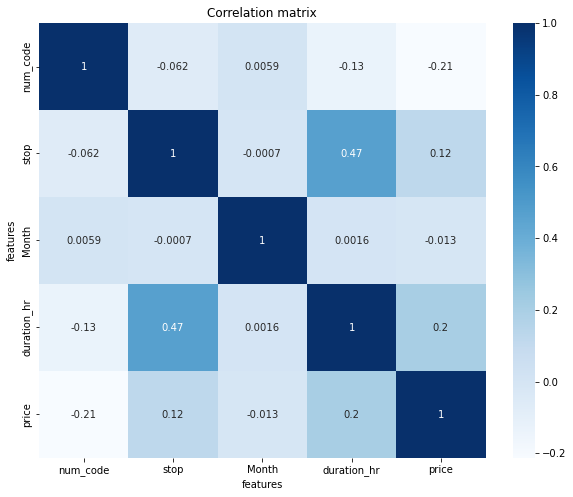

In [16]:
plt.figure(figsize=(10,8))

sns.heatmap(df[['num_code','stop','Weekday','Month','duration_hr','price']].corr(),cmap='Blues',annot=True)
plt.title("Correlation matrix")
plt.xlabel("features")
plt.ylabel("features")
plt.show()

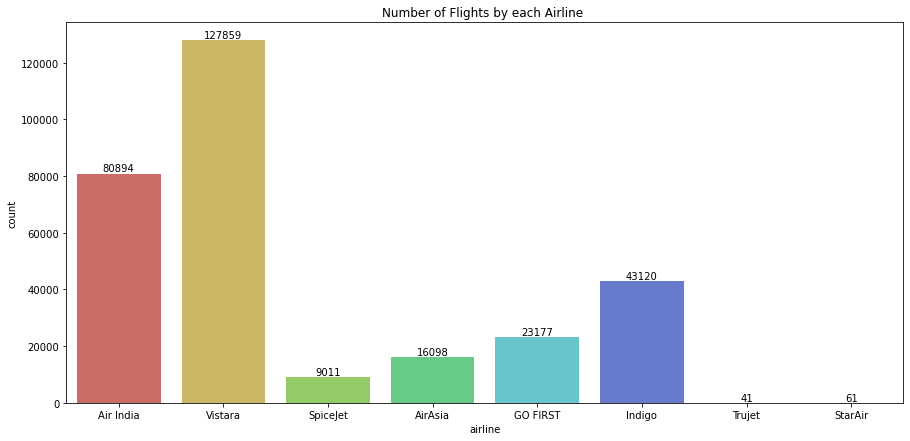

In [17]:
plt.figure(figsize=(15,7))
fig = sns.countplot(df['airline'],palette='hls')
fig.bar_label(fig.containers[0])
plt.title("Number of Flights by each Airline ")
plt.show()

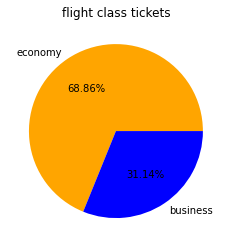

[['economy' 206774]
 ['business' 93487]]


In [18]:
class_count = df['class'].value_counts().reset_index()

plt.figure(figsize=(10,4))

plt.pie(class_count['class'],labels=class_count['index'],autopct='%0.2f%%', colors=['orange','blue'])

plt.title('flight class tickets')

plt.show()

print(class_count.values)

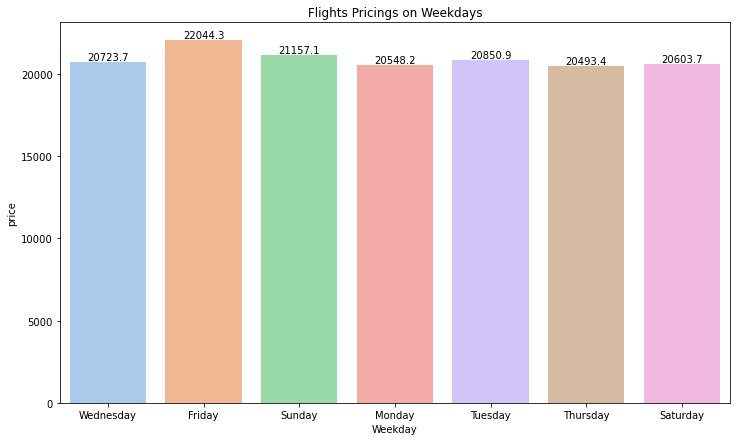

In [19]:
plt.figure(figsize=(12,7))

fig = sns.barplot(data = df, x='Weekday', y='price', palette='pastel', ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings on Weekdays")

plt.show()

for p in fig.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage,(x,y),ha='center')

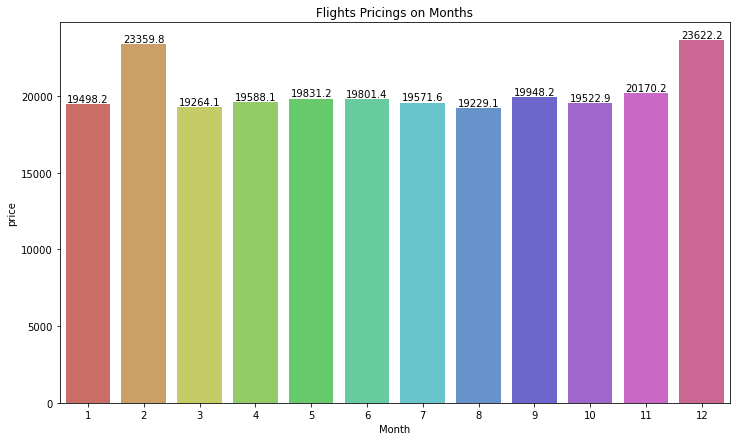

In [20]:
plt.figure(figsize=(12,7))

fig = sns.barplot(data = df, x='Month', y='price', palette='hls',ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings on Months")

plt.show()

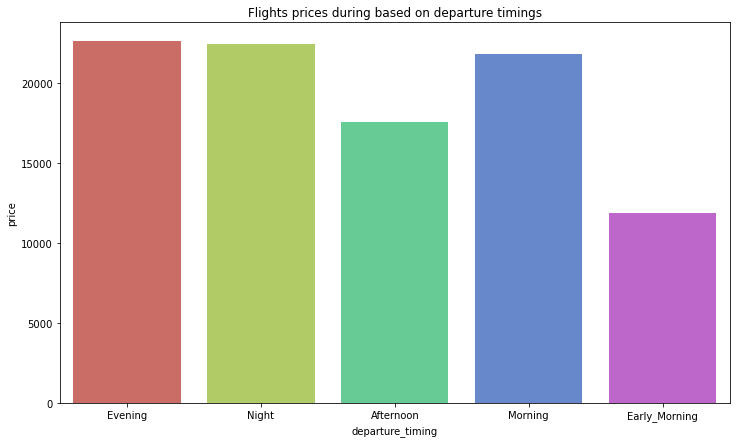

In [21]:
plt.figure(figsize=(12,7))


fig = sns.barplot(data = df, x='departure_timing', y='price', palette='hls', ci=None)

plt.title("Flights prices during based on departure timings")


plt.show()

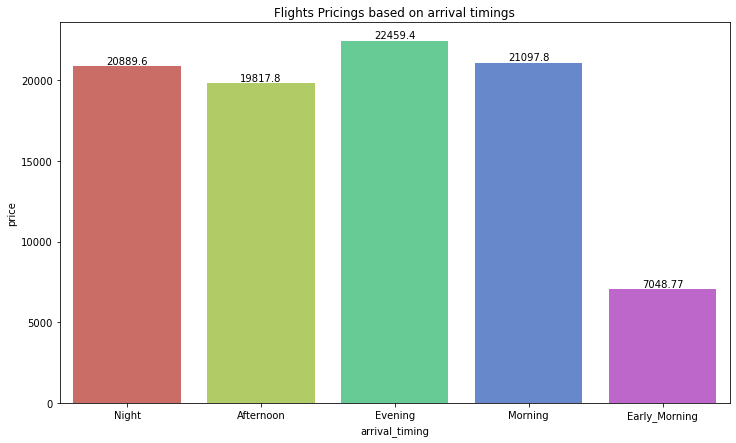

In [22]:
plt.figure(figsize=(12,7))

fig = sns.barplot(data = df, x='arrival_timing', y='price', palette='hls',ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings based on arrival timings")

plt.show()

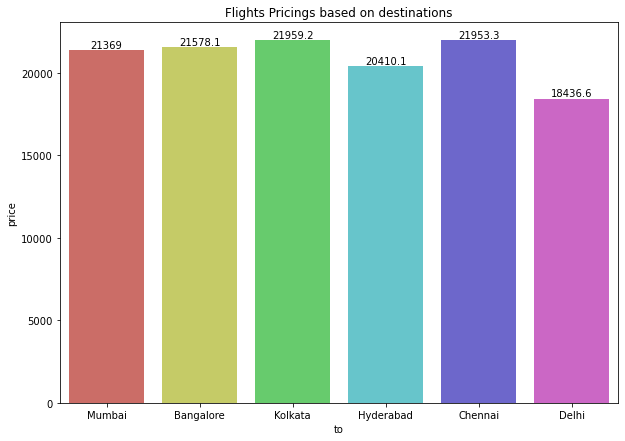

In [23]:
plt.figure(figsize=(10,7))

fig = sns.barplot(data = df, x='to', y='price', palette='hls',ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings based on destinations")

plt.show()

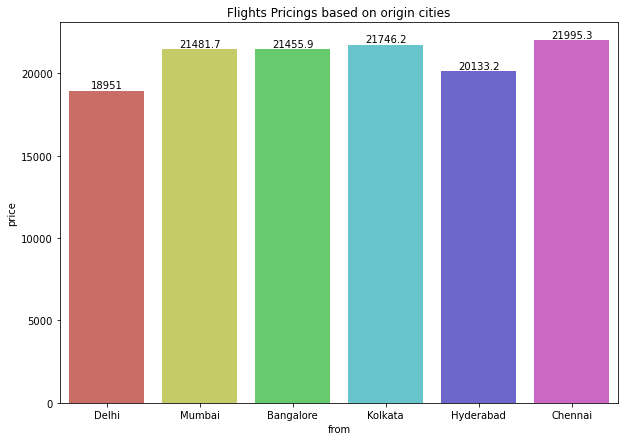

In [24]:
plt.figure(figsize=(10,7))

fig = sns.barplot(data = df, x='from', y='price', palette='hls',ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings based on origin cities")

plt.show()

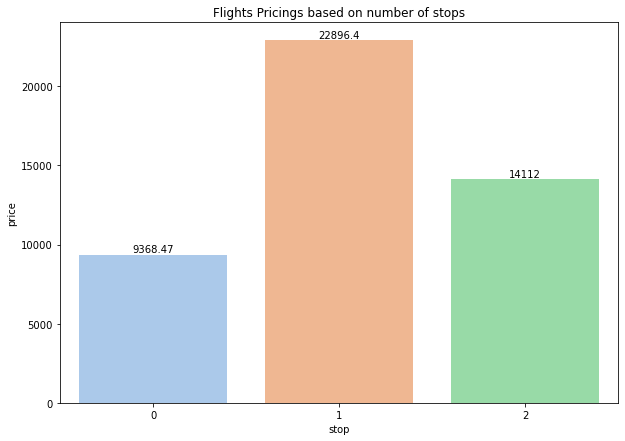

In [25]:

plt.figure(figsize=(10,7))

fig = sns.barplot(data = df, x='stop', y='price', palette='pastel',ci=None)

fig.bar_label(fig.containers[0])

plt.title("Flights Pricings based on number of stops")

plt.show()

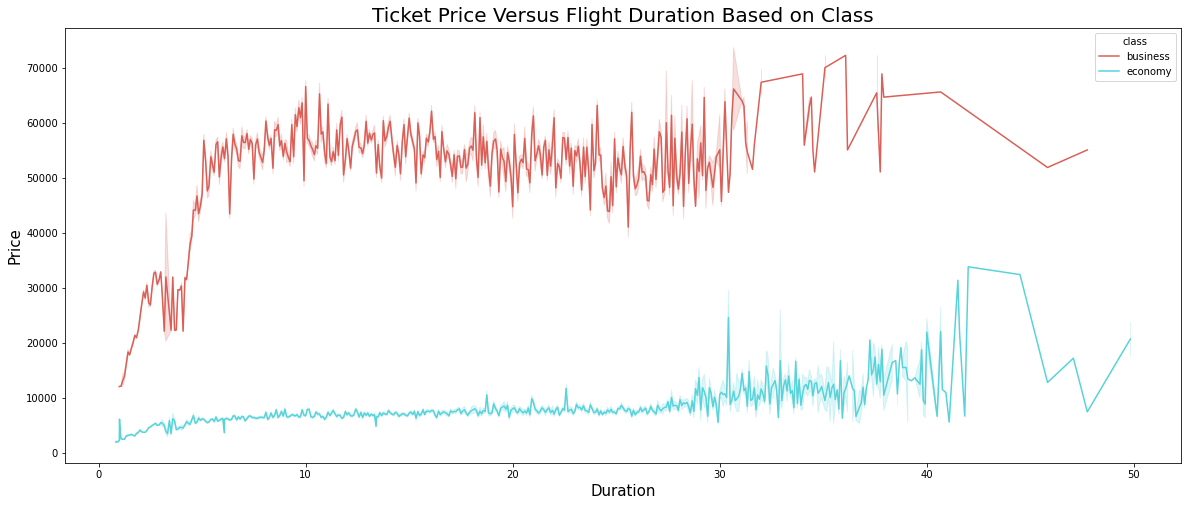

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration_hr',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

#### <font color='blue'>Outlier Analysis on `Price` target feature</font>

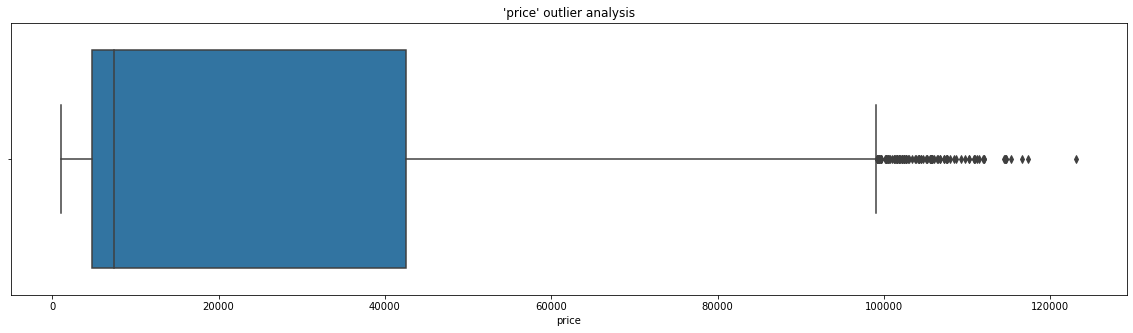

In [27]:
plt.figure(figsize=(20,5))

sns.boxplot(df['price'])

plt.title("'price' outlier analysis")

plt.show()

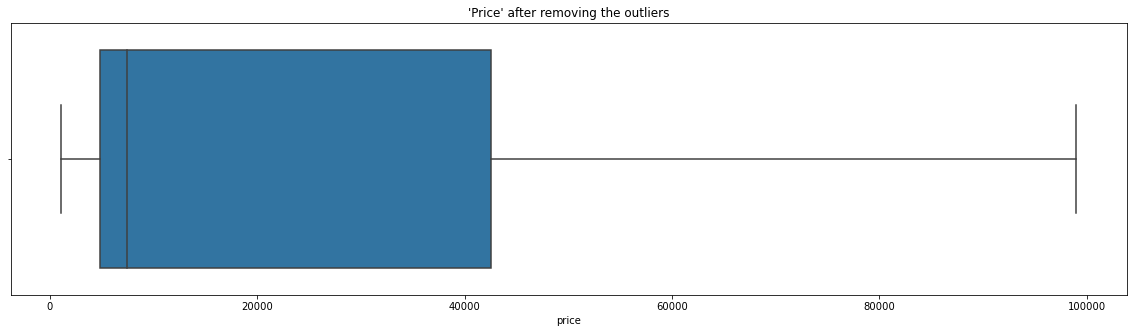

In [28]:
train_df = df.copy()

#Identifying the IQR- to detect the outliers in our target feature
IQR_value = 1.5*(np.percentile(df['price'],75) - np.percentile(df['price'],25))

Q1_val = np.percentile(df['price'],25) - IQR_value

Q3_val = IQR_value + np.percentile(df['price'],75)

train_df.drop(train_df[train_df['price']>Q3_val].index, inplace=True)

train_df.drop(train_df[train_df['price']<Q1_val].index, inplace=True)

plt.figure(figsize=(20,5))

sns.boxplot(train_df['price'])

plt.title("'Price' after removing the outliers")

plt.show()

#### <font color='blue'>Analysing the distribution of the numerical data in our dataset</font>

In [29]:
from scipy.stats import skew, kurtosis, zscore

#Function to plot distribution of the numeric features
def numeric_distribution_analysis(df,cols):
    
    plt.figure(figsize=(15,5))
    
    fig_cols = (len(cols)//3)+1
    
    fig = 1
    
    for col in cols:
        title = "kurtosis:" + str(skew(df[col])) + "\nskewness:" + str(kurtosis(df[col]))
        plt.subplot(fig_cols,3, fig)
        sns.distplot(df[col]).set_title(title)
        fig = fig + 1

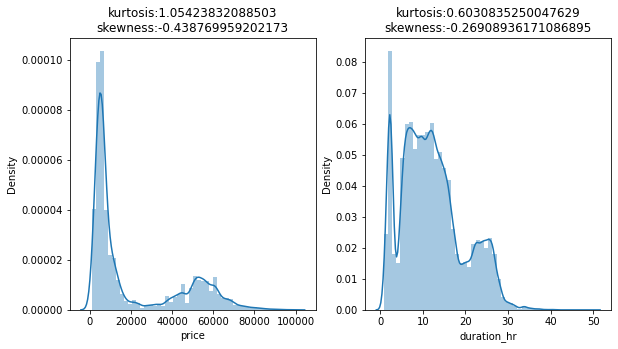

In [30]:
numeric_distribution_analysis(train_df, ['price','duration_hr'])

#### <font color='blue'>Standardising the numerical data in our dataset</font>

In [31]:
train_df.head()

,airline,ch_code,num_code,from,stop,to,price,class,Weekday,Month,Year,departure_timing,arrival_timing,duration_hr
0,Air India,AI,868,Delhi,0,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.00
1,Air India,AI,624,Delhi,0,Mumbai,25612.0,business,Wednesday,11,2022,Evening,Night,2.25
2,Air India,AI,531,Delhi,1,Mumbai,42220.0,business,Wednesday,11,2022,Night,Night,24.75
3,Air India,AI,839,Delhi,1,Mumbai,44450.0,business,Wednesday,11,2022,Night,Night,26.50
4,Air India,AI,544,Delhi,1,Mumbai,46690.0,business,Wednesday,11,2022,Evening,Night,6.67


In [32]:
#Importing the PowerTransformer to scale the data
from sklearn.preprocessing import PowerTransformer

power_transform = PowerTransformer()

#Function to apply transformation on train
def apply_scaler_train(df,cols):
    for col in cols:
        df[[col]] = power_transform.fit_transform(df[[col]])
    return df

#Function to apply transformation on test
def apply_scaler_test(df,cols):
    for col in cols:
        df[[col]] = power_transform.transform(df[[col]])
    return df

#Function to apply inverse transformation
def apply_inverse_scaler(df,cols):
    for col in cols:
        df[[col]] = power_transform.inverse_transform(df[[col]])
    return df

In [33]:
#Numeric columns
numeric_columns = ['price', 'duration_hr']

In [34]:
scaled_train_df = apply_scaler_train(train_df,numeric_columns)

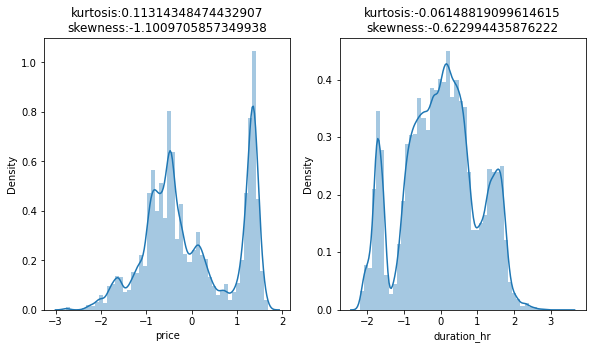

In [35]:
numeric_distribution_analysis(scaled_train_df, ['price','duration_hr'])

#### <font color='blue'>Handling Categorical features - OneHotEncoding</font>

In [36]:
scaled_train_df.head()

,airline,ch_code,num_code,from,stop,to,price,class,Weekday,Month,Year,departure_timing,arrival_timing,duration_hr
0,Air India,AI,868,Delhi,0,Mumbai,0.825866,business,Wednesday,11,2022,Evening,Night,-1.784854
1,Air India,AI,624,Delhi,0,Mumbai,0.825866,business,Wednesday,11,2022,Evening,Night,-1.708510
2,Air India,AI,531,Delhi,1,Mumbai,1.180309,business,Wednesday,11,2022,Night,Night,1.534242
3,Air India,AI,839,Delhi,1,Mumbai,1.214368,business,Wednesday,11,2022,Night,Night,1.692186
4,Air India,AI,544,Delhi,1,Mumbai,1.246496,business,Wednesday,11,2022,Evening,Night,-0.700180


In [37]:
dummy_train_df = pd.get_dummies(scaled_train_df, columns=['airline','from','to','class','Weekday','Month'
                                                          ,'Year','departure_timing','arrival_timing'])

#### <font color='blue'>Train-Test data Split</font>

In [38]:
from sklearn.model_selection import train_test_split

X = dummy_train_df.drop(columns=['price','ch_code','num_code'])

y = dummy_train_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### <font color='blue'>Model Building</font>

##### <font color='blue'>1. Linear Regression</font>

In [39]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

LinearModel = LinearRegression()

#fitting the model on train dataset
LinearModel.fit(X_train, y_train)

#test data predictions
LR_Predictions = LinearModel.predict(X_test)

#RMSE score
LinearModel_RMSE = np.sqrt(mean_squared_error(y_test,LR_Predictions))

print("Linear Regression Model RMSE = ",LinearModel_RMSE)

print("Linear Regression Model R2 Score = ",r2_score(y_test,LR_Predictions))

Linear Regression Model RMSE =  0.35100178709619095
Linear Regression Model R2 Score =  0.8765795241604888


##### <font color='blue'>2. Regularised Regression - Lasso </font>

In [40]:
from sklearn.linear_model import Lasso

lasso_Model = Lasso(alpha=0.001)

#fitting the model on train dataset
lasso_Model.fit(X_train, y_train)

#test data predictions
lasso_Predictions = lasso_Model.predict(X_test)

#RMSE score
Lasso_RMSE = np.sqrt(mean_squared_error(y_test,lasso_Predictions))

print("Lasso Regularised Regression Model RMSE = ",Lasso_RMSE)

print("Lasso Regularised Regression Model R2 Score = ",r2_score(y_test,lasso_Predictions))

Lasso Regularised Regression Model RMSE =  0.35185243768453195
Lasso Regularised Regression Model R2 Score =  0.8759805818031501


##### <font color='blue'>3. Regularised Regression - Ridge </font>

In [41]:
from sklearn.linear_model import Ridge

Ridge_Model = Ridge(alpha=0.0001)

#fitting the model on train dataset
Ridge_Model.fit(X_train, y_train)

#test data predictions
Ridge_Predictions = Ridge_Model.predict(X_test)

#RMSE score
Ridge_RMSE = np.sqrt(mean_squared_error(y_test,Ridge_Predictions))

print("Ridge Regularised Regression Model RMSE = ",Ridge_RMSE)

print("Ridge Regularised Regression Model R2 Score = ",r2_score(y_test,Ridge_Predictions))

Ridge Regularised Regression Model RMSE =  0.35100826929432555
Ridge Regularised Regression Model R2 Score =  0.8765749655320425


##### <font color='blue'>4. KNeighbors Regressor</font>

In [42]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborModel = KNeighborsRegressor(n_neighbors = 10)

#fitting the model on train dataset
KNeighborModel.fit(X_train,y_train)

KNeighbor_Predictions = KNeighborModel.predict(X_test)

KNeighbor_RMSE = np.sqrt(mean_squared_error(y_test,KNeighbor_Predictions))

print("KNeighbors Regressor Model RMSE = ",KNeighbor_RMSE)

print("KNeighbors Regressor Model R2 Score = ",r2_score(y_test,KNeighbor_Predictions))

KNeighbors Regressor Model RMSE =  0.285974530807231
KNeighbors Regressor Model R2 Score =  0.9180737128313852


##### <font color='blue'>5. Decision Tree Regressor</font>

In [43]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_Model = DecisionTreeRegressor()

#Fitting the model on the traib data
DecisionTree_Model.fit(X_train,y_train)

#Predicting the test data flight ticket prices
DecisionTree_Predictions = DecisionTree_Model.predict(X_test)

DecisionTree_RMSE = np.sqrt(mean_squared_error(y_test,DecisionTree_Predictions))

print("DecisionTree Regressor Model RMSE = ",DecisionTree_RMSE)

print("DecisionTree Regressor Model R2 Score = ",r2_score(y_test,DecisionTree_Predictions))

DecisionTree Regressor Model RMSE =  0.2924759363654734
DecisionTree Regressor Model R2 Score =  0.9143063105576222


##### <font color='blue'>6. XGBoost with RandomizedSearchCV</font>

In [44]:
from xgboost import XGBRegressor

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import RandomizedSearchCV

xgbRegressorModel = XGBRegressor()

parameters_to_tune = {'objective':['reg:squarederror']
                     ,'learning_rate':[0.5,1]
                     ,'max_depth':[15]
                     , 'n_estimators':[100]
                     }

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

xgbRegressorModel_RandomCV = RandomizedSearchCV(xgbRegressorModel, parameters_to_tune, cv=cv, n_jobs = 5, verbose=True )

xgbRegressorModel_RandomCV.fit(X_train,y_train)

print("XGBRegressor Model Best Parameters = ",xgbRegressorModel_RandomCV.best_params_)

print("XGBRegressor Model Best Score = ",xgbRegressorModel_RandomCV.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

XGBRegressor Model Best Parameters =  {'objective': 'reg:squarederror', 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.5}
XGBRegressor Model Best Score =  0.9293644399211372


In [45]:
#Test Data Predictions
XGBRegressor_Predictions = xgbRegressorModel_RandomCV.predict(X_test)


XGBRegressor_RMSE = np.sqrt(mean_squared_error(y_test,XGBRegressor_Predictions))

print("XGBRegressor Model RMSE = ",XGBRegressor_RMSE)

print("XGBRegressor Regressor Model R2 Score = ",r2_score(y_test,XGBRegressor_Predictions))

XGBRegressor Model RMSE =  0.2657870354301739
XGBRegressor Regressor Model R2 Score =  0.9292321262300378


##### <font color='blue'>7. Ensemble: Stacking Model</font>

In [46]:
from sklearn.ensemble import StackingRegressor

model_estimators  = [('LinearRegression',LinearModel)
                     ,('XGBRegressor',xgbRegressorModel_RandomCV)
                     ,('DecisionTree',DecisionTree_Model)
                     ,('KNeighborsRegressor',KNeighborModel)
                    ]

StackingRegressor_Model = StackingRegressor(estimators=model_estimators
                                           , final_estimator = xgbRegressorModel_RandomCV)

#fitting the train data
StackingRegressor_Model.fit(X_train,y_train)

#predicting the test data flight prices
StackingRegressor_Predictions = StackingRegressor_Model.predict(X_test)

StackingRegressor_RMSE = np.sqrt(mean_squared_error(y_test,StackingRegressor_Predictions))

print("StackingRegressor Model RMSE = ",StackingRegressor_RMSE)

print("StackingRegressor Regressor Model R2 Score = ",r2_score(y_test,StackingRegressor_Predictions))


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pramodhroy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

StackingRegressor Model RMSE =  0.24674475503462656
StackingRegressor Regressor Model R2 Score =  0.9390091872401752


In [48]:
# Train RMSE, R2 Scores for the all the models 


#1. Linear Regression
#test data predictions
LR_Predictions_train = LinearModel.predict(X_train)

#RMSE score
LinearModel_RMSE_train = np.sqrt(mean_squared_error(y_train,LR_Predictions_train))

LinearModel_R2_train = r2_score(y_train,LR_Predictions_train)

print("Linear Regression Model RMSE = ",LinearModel_RMSE_train)

print("Linear Regression Model R2 Score = ",LinearModel_R2_train)


#####################################

#2.Lasso Regularised Regressor

#test data predictions
lasso_Predictions_train = lasso_Model.predict(X_train)

#RMSE score
Lasso_RMSE_train = np.sqrt(mean_squared_error(y_train,lasso_Predictions_train))

#R2 Score
Lasso_R2_train = r2_score(y_train,lasso_Predictions_train)

print("\nLasso Regularised Regression Model RMSE = ",Lasso_RMSE_train)

print("Lasso Regularised Regression Model R2 Score = ",Lasso_R2_train)

#####################################

#3.Ridge Regularised Regressor


#test data predictions
Ridge_Predictions_train = Ridge_Model.predict(X_train)

#RMSE score
Ridge_RMSE_train = np.sqrt(mean_squared_error(y_train,Ridge_Predictions_train))

#R2 Score
Ridge_R2_train = r2_score(y_train,Ridge_Predictions_train)

print("\nRidge Regularised Regression Model RMSE = ",Ridge_RMSE)

print("Ridge Regularised Regression Model R2 Score = ",Ridge_R2_train)


###################################

#4.KNeighbors Regression

KNeighbor_Predictions_train = KNeighborModel.predict(X_train)

KNeighbor_RMSE_train = np.sqrt(mean_squared_error(y_train,KNeighbor_Predictions_train))

#R2 Score
KNeighbor_R2_train = r2_score(y_train,KNeighbor_Predictions_train)

print("KNeighbors Regressor Model RMSE = ",KNeighbor_RMSE_train)

print("KNeighbors Regressor Model R2 Score = ",KNeighbor_R2_train)


###################################

#5. DecisionTree

#Predicting the test data flight ticket prices
DecisionTree_Predictions_train = DecisionTree_Model.predict(X_train)

DecisionTree_RMSE_train = np.sqrt(mean_squared_error(y_train,DecisionTree_Predictions_train))

DecisionTree_R2_train  = r2_score(y_train,DecisionTree_Predictions_train)

print("\nDecisionTree Regressor Model RMSE = ",DecisionTree_RMSE_train)

print("DecisionTree Regressor Model R2 Score = ",r2_score(y_train,DecisionTree_Predictions_train))

######################################

#6. XGBoost

XGBRegressor_Predictions_train = xgbRegressorModel_RandomCV.predict(X_train)


XGBRegressor_RMSE_train = np.sqrt(mean_squared_error(y_train,XGBRegressor_Predictions_train))

XGBRegressor_R2_train  = r2_score(y_train,XGBRegressor_Predictions_train)

print("XGBRegressor Model RMSE = ",XGBRegressor_RMSE_train)

print("XGBRegressor Regressor Model R2 Score = ",XGBRegressor_R2_train)

########################################

#7.StackingRegressor

StackingRegressor_Predictions_train = StackingRegressor_Model.predict(X_train)

StackingRegressor_RMSE_train = np.sqrt(mean_squared_error(y_train,StackingRegressor_Predictions_train))



Linear Regression Model RMSE =  0.3521856623053302
Linear Regression Model R2 Score =  0.8760730833070278

Lasso Regularised Regression Model RMSE =  0.353132385591995
Lasso Regularised Regression Model R2 Score =  0.8754059227572949

Ridge Regularised Regression Model RMSE =  0.35100826929432555
Ridge Regularised Regression Model R2 Score =  0.8760984496400094
KNeighbors Regressor Model RMSE =  0.26029526525612173
KNeighbors Regressor Model R2 Score =  0.9323052734613481

DecisionTree Regressor Model RMSE =  0.12966252408284895
DecisionTree Regressor Model R2 Score =  0.9832022449286343
XGBRegressor Model RMSE =  0.1304311147172983
XGBRegressor Regressor Model R2 Score =  0.9830025131726862


NameError: name 'vStackingRegressor_Predictions_train' is not defined

In [49]:
StackingRegressor_R2_train  = r2_score(y_train, StackingRegressor_Predictions_train)

print("StackingRegressor Model RMSE = ",StackingRegressor_RMSE_train)

print("StackingRegressor Regressor Model R2 Score = ",StackingRegressor_R2_train)

StackingRegressor Model RMSE =  0.21703927104331916
StackingRegressor Regressor Model R2 Score =  0.9529349043532489


In [159]:
#Creating a dataframe to hold the values of the r2, rmse of various models

 
data = {'Linear Regression Model RMSE' : [0.3521856623053302],
'Linear Regression Model R2 Score' : [0.8760730833070278],

'Lasso Regularised Regression Model RMSE' : [0.353132385591995],
'Lasso Regularised Regression Model R2 Score' :[0.8754059227572949],

'Ridge Regularised Regression Model RMSE'  :[0.35100826929432555],
'Ridge Regularised Regression Model R2 Score' : [0.8760984496400094],
'KNeighbors Regressor Model RMSE' : [0.26029526525612173],
'KNeighbors Regressor Model R2 Score' : [0.9323052734613481],

'DecisionTree Regressor Model RMSE':  [0.12966252408284895],
'DecisionTree Regressor Model R2 Score' : [0.9832022449286343],
'XGBRegressor Model RMSE' : [0.1304311147172983],
'XGBRegressor Regressor Model R2 Score' :[0.9830025131726862],
'StackingRegressor Model RMSE' :  [0.21703927104331916],
'StackingRegressor Regressor Model R2 Score':  [0.9529349043532489]}

ModelScore_df = pd.DataFrame.from_dict(data)
ModelScore_df

,Linear Regression Model RMSE,Linear Regression Model R2 Score,Lasso Regularised Regression Model RMSE,Lasso Regularised Regression Model R2 Score,Ridge Regularised Regression Model RMSE,Ridge Regularised Regression Model R2 Score,KNeighbors Regressor Model RMSE,KNeighbors Regressor Model R2 Score,DecisionTree Regressor Model RMSE,DecisionTree Regressor Model R2 Score,XGBRegressor Model RMSE,XGBRegressor Regressor Model R2 Score,StackingRegressor Model RMSE,StackingRegressor Regressor Model R2 Score
0,0.352186,0.876073,0.353132,0.875406,0.351008,0.876098,0.260295,0.932305,0.129663,0.983202,0.130431,0.983003,0.217039,0.952935


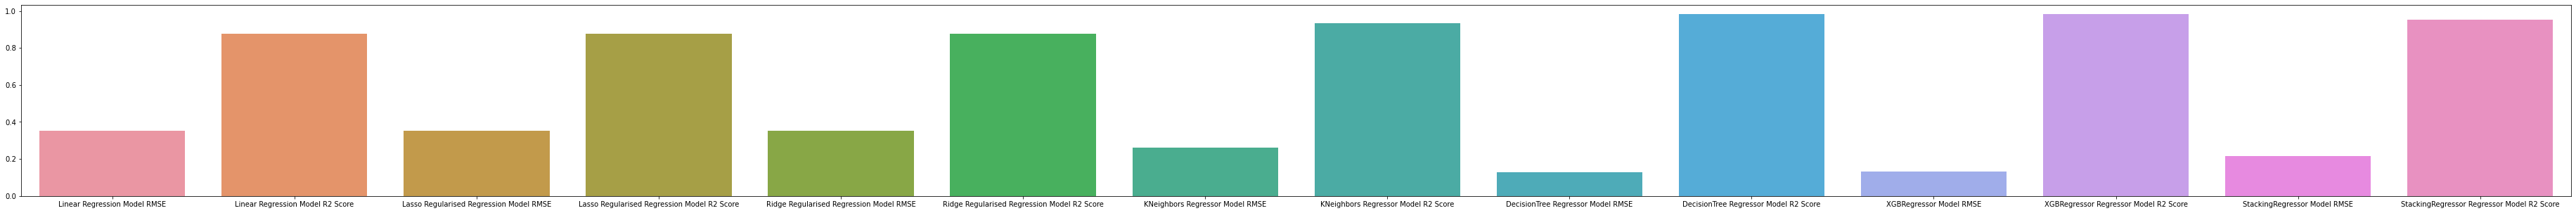

### <font color='blue'>Analysing the cleaned Datasets - Clean_Dataset.csv</font>


In [52]:
#df = pd.read_csv(file_path)

#Reading the Dataset

df= pd.read_csv('Clean_Dataset.csv')

df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [53]:
len(df["Unnamed: 0"].unique())

300153

In [54]:
#Columns in the dataset
print("columns in Dataset :\n",df.columns.values,'\n')

df.info()

columns in Dataset :
 ['Unnamed: 0' 'airline' 'flight' 'source_city' 'departure_time' 'stops'
 'arrival_time' 'destination_city' 'class' 'duration' 'days_left' 'price'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory

In [55]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<font color='blue'>Insights:</font>
<p>We have 11 features with 300153 entries. Our target feature is 'price' and other features are airline, flight, source city, depature time, stops in between, arrival time , class, duration... . Few of the features are of 'object' datatype which we might need to typecast</p>

#### <font color='blue'>Data Cleaning</font>

In [56]:
#Dropping 'Unamed: 0' column as it doesn't have any information
df.drop('Unnamed: 0', axis=1, inplace=True)
print("After dropping the 'Unamed:0' column from the dataset:\n")
df.head(2)

After dropping the 'Unamed:0' column from the dataset:



,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


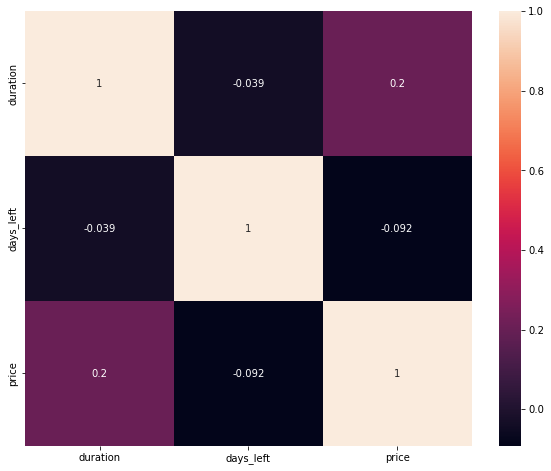

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

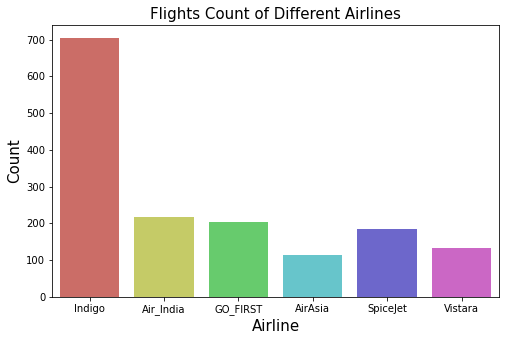

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [60]:
# so indigo has most flights

In [61]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

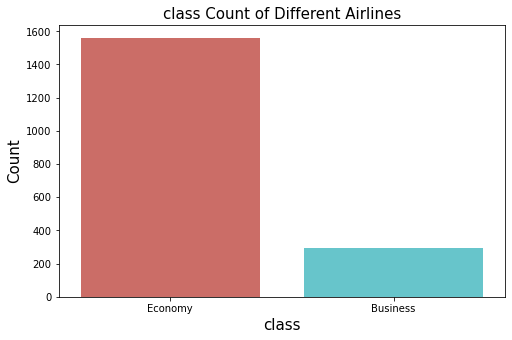

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(df2['class'],palette='hls')
plt.title('class Count of Different Airlines',fontsize=15)
plt.xlabel('class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

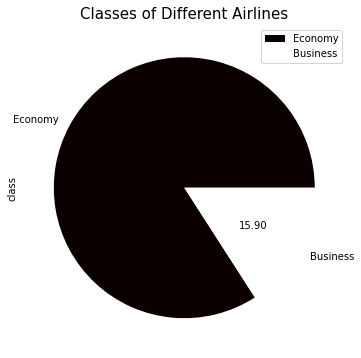

In [63]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='hot')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

In [64]:
# Economy class in present in almost all the airlines

In [65]:
# airlines vs cost

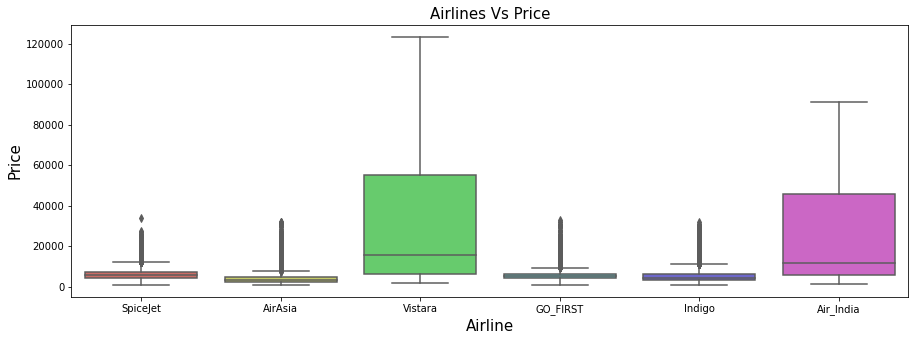

In [66]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [67]:
# visatara and air india has maximum prices remaining airlines are economical

In [68]:
# business class vs economy class price difference

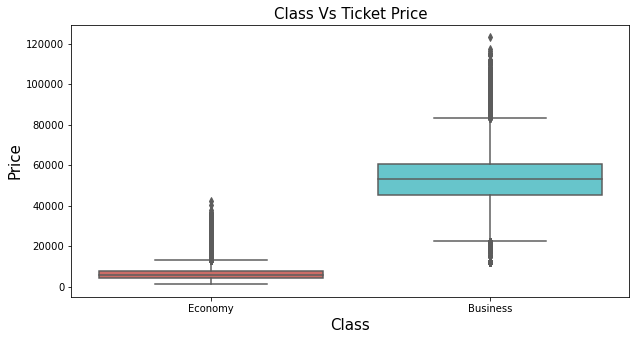

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


In [70]:
# does no of stops have an impact on price


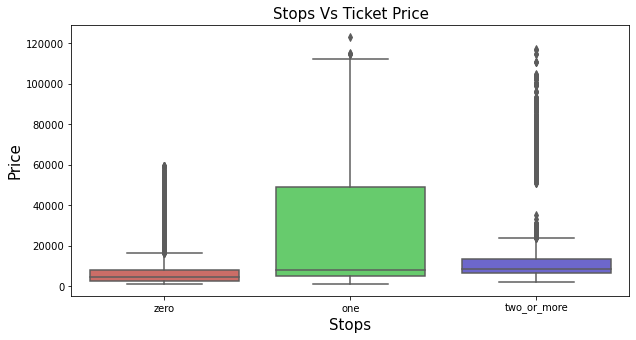

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.stops,y=df.price,data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [72]:
# so if stop is 1 you have max price on the ticket 

In [73]:
# How the Ticket Price change based on the Departure Time and Arrival Time?
# 1. Departure Time Vs Ticket Price

# Ticket Price is More for the Flights when the Departure Time is at Night
# Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
# Ticket Price is Low for the Flights Having Departure Time at Late_night
# 2. Arrival Time Vs Ticket Price
# Ticket Price is More for the Flights when the Arrival Time is at Evening
# Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
# Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

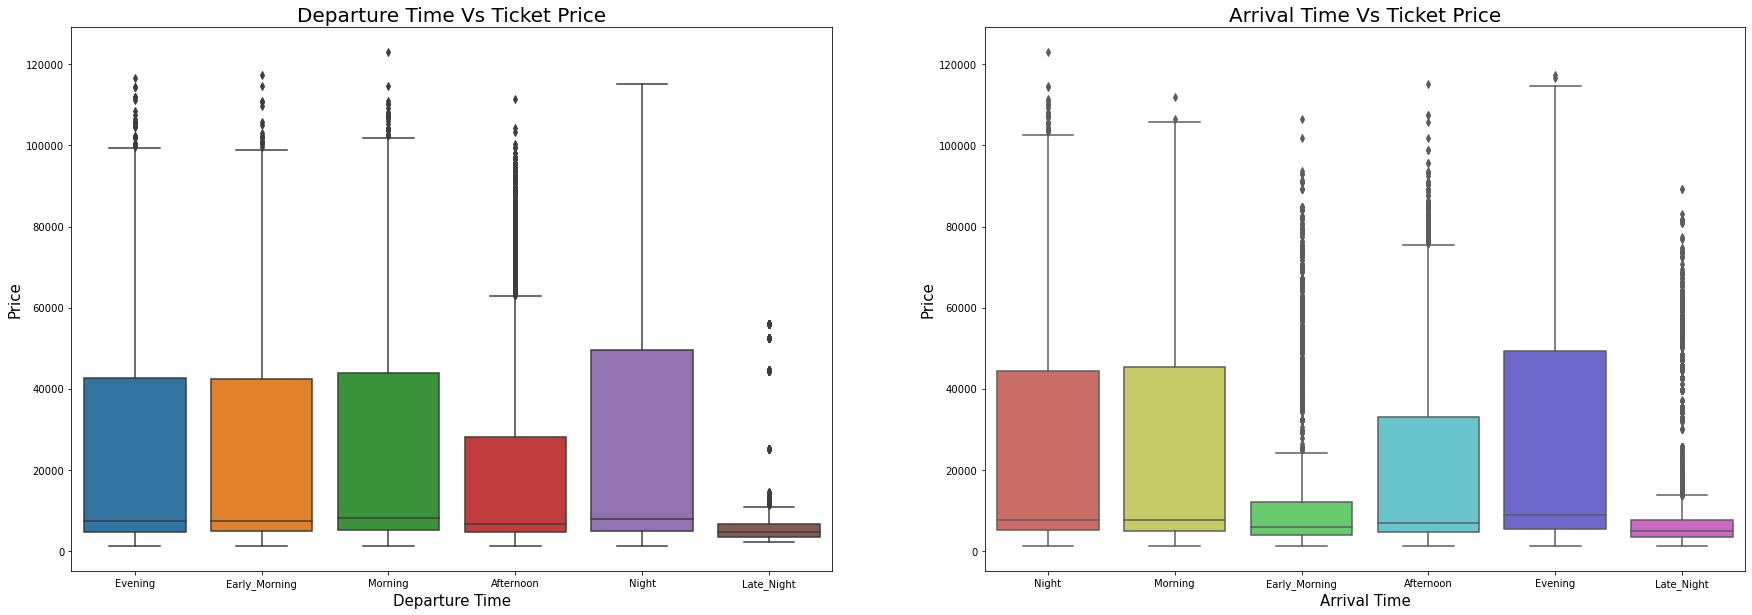

In [74]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

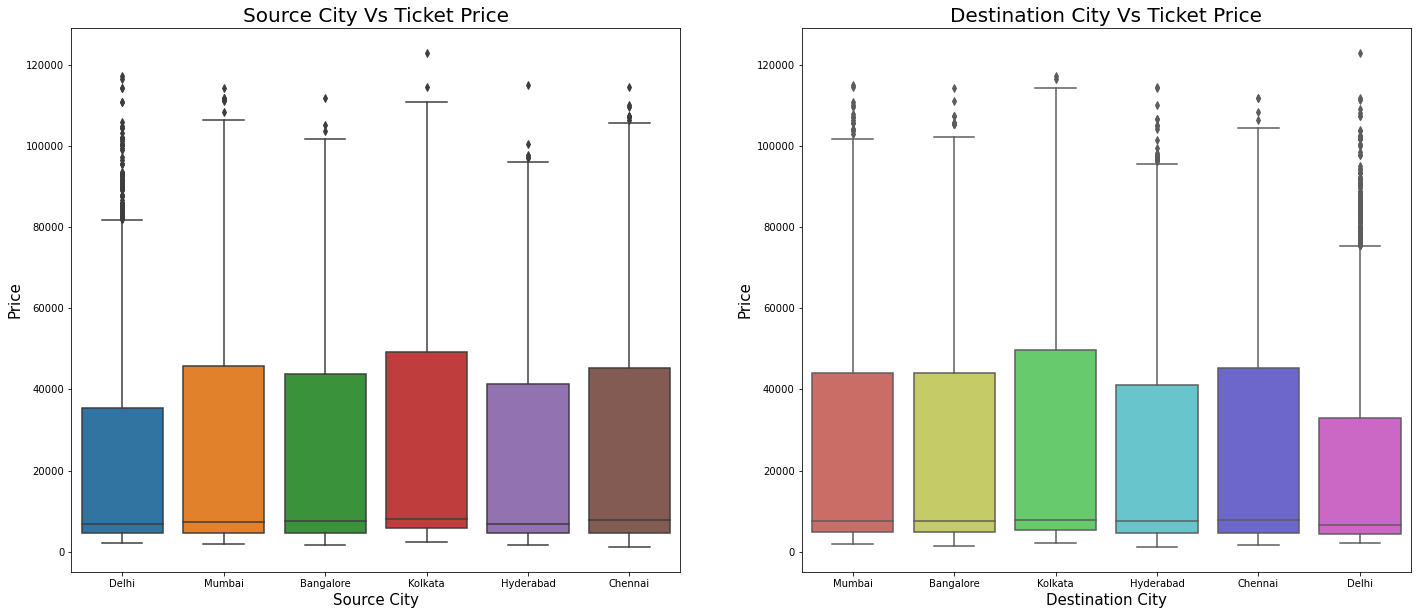

In [75]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

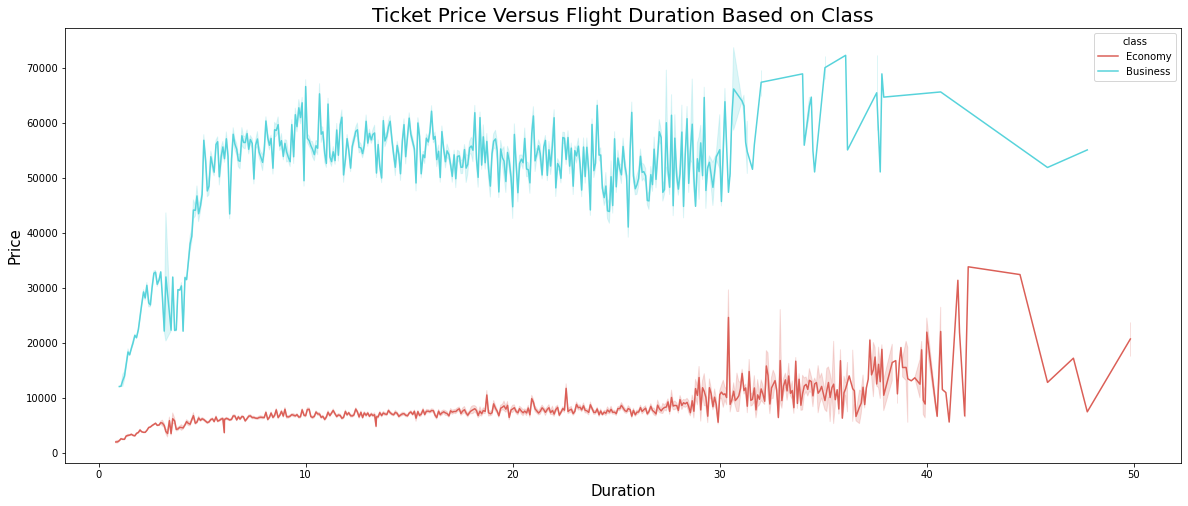

In [76]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

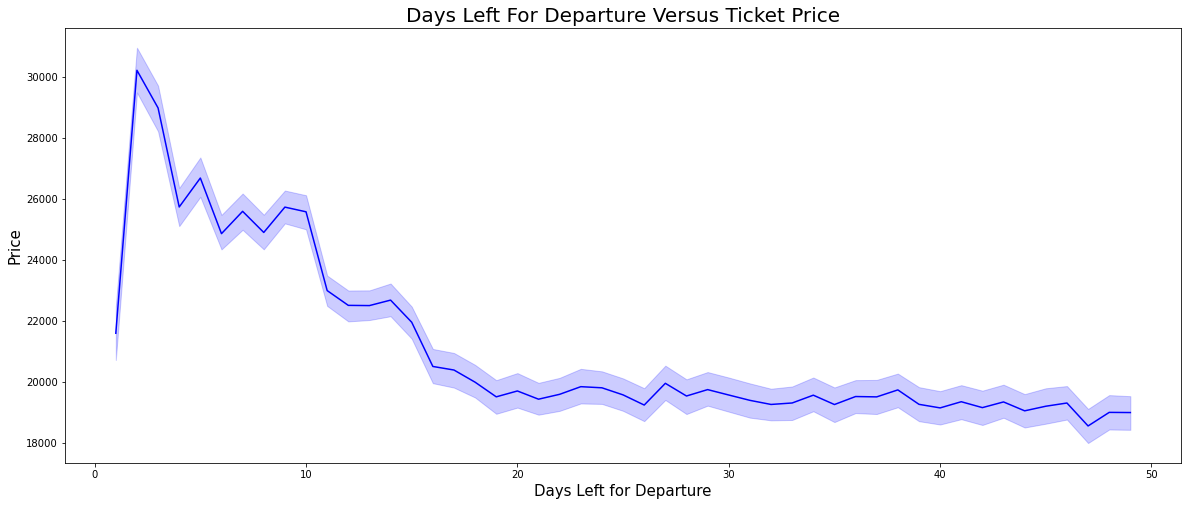

In [77]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

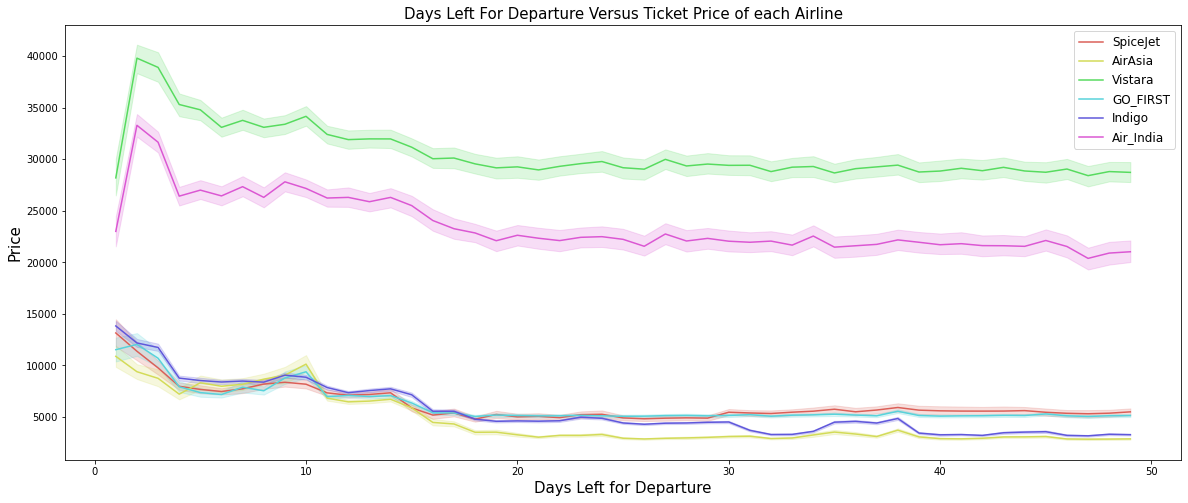

In [78]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [79]:
# total flights from cities 

In [80]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [81]:
# mean price difference of flights

In [82]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [83]:
# how to find outliers?

In [84]:
# now checking outliers for price 
df.price.nunique()

12157

In [85]:
df.price.value_counts()

54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
12014       1
26912       1
20145       1
25462       1
7533        1
Name: price, Length: 12157, dtype: int64

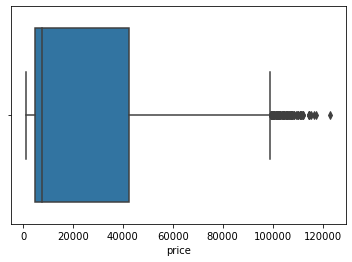

In [86]:
sns.boxplot(x=df['price'])
plt.show()

<AxesSubplot:xlabel='days_left'>

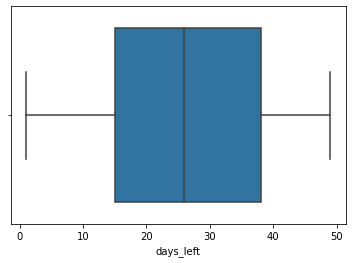

In [87]:
sns.boxplot(x=df.days_left)

In [88]:
# identifying outliers using a IQR

In [89]:
df_bk = df.copy()
df_bk.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [90]:
Q1 = df_bk.quantile(0.25)
Q3 = df_bk.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

duration         9.34
days_left       23.00
price        37738.00
dtype: float64


#### detecting with outliers

In [91]:
df_bk_out = df_bk[~((df_bk < (Q1 - 1.5 * IQR)) |(df_bk > (Q3 + 1.5 * IQR))).any(axis=1)]
df_bk_out.shape

(297920, 11)

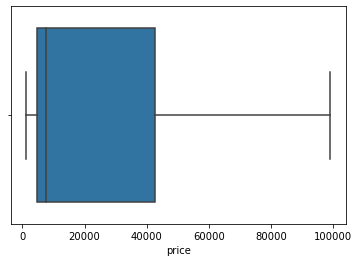

In [92]:
sns.boxplot(x=df_bk_out['price'])
plt.show()

In [93]:
# removing some of the outliers through this method makes the model better

In [94]:
# now Creating a test df with next flight prices for the next 30 days

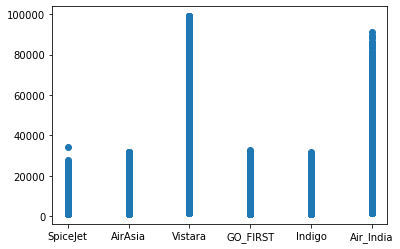

In [95]:
fig = plt.scatter(x=df_bk_out['airline'], y=df_bk_out['price'])
plt.show()


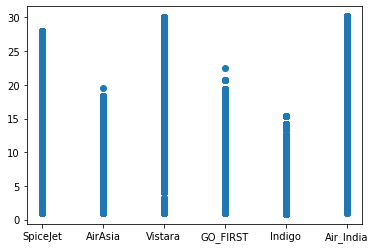

In [96]:
fig = plt.scatter(x=df_bk_out['airline'], y=df_bk_out['duration'])
plt.show()

In [97]:
def find_outliers_IQR(df):
    
    one=df.quantile(0.25)

    three=df.quantile(0.75)

    IQR=three-one

    outliers = df[((df<(one-1.5*IQR)) | (df>(three+1.5*IQR)))]
    
    return outliers

In [98]:
outliers = find_outliers_IQR(df_bk_out["days_left"])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: days_left, dtype: int64)

In [99]:
outliers = find_outliers_IQR(df_bk_out["price"])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: price, dtype: int64)

In [100]:
input_cols = list(df_bk.columns[0:-1])
target_col = 'price'

In [101]:
input_cols

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [102]:
target_col

'price'

In [103]:
inputs_df = df_bk[input_cols].copy()
targets_df = df_bk[target_col].copy()

In [104]:
numeric_cols= inputs_df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

In [105]:
# final check for null values 
inputs_df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [106]:
inputs_df[numeric_cols].describe().loc[['min','max']]

,duration,days_left
min,0.83,1.0
max,49.83,49.0


In [107]:
# Scaling numeric values 
from sklearn.preprocessing import MinMaxScaler
# create a scaler
scaler = MinMaxScaler()
# fit the scaler to numeric cols 
scaler.fit(inputs_df[numeric_cols])
MinMaxScaler()
# transform and replace numeric cols
inputs_df[numeric_cols]=scaler.transform(inputs_df[numeric_cols])

In [108]:
inputs_df[numeric_cols].describe().loc[['min','max']]

,duration,days_left
min,0.0,0.0
max,1.0,1.0


In [109]:
# Encoding categorical variables
inputs_df[categorical_cols].nunique().sort_values(ascending=True)

class                  2
stops                  3
airline                6
source_city            6
departure_time         6
arrival_time           6
destination_city       6
flight              1561
dtype: int64

In [110]:
categorical_cols

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [111]:
categorical_cols_1=['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']
categorical_cols_2 = ['flight']


In [112]:
# As there are 1561 unique values for flight columns, I am using target encoding to reduce dimensionality of the dateset
from sklearn.preprocessing import LabelEncoder
encoder_1 = LabelEncoder()
# Assigning numerical values and storing in another column
inputs_df["flight"] = encoder_1.fit_transform(inputs_df["flight"])

# encoding other features in one hot encoding 
from sklearn.preprocessing import OneHotEncoder
encoder_2 = OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder_2.fit(inputs_df[categorical_cols_1])
encoded_cols = list(encoder_2.get_feature_names(categorical_cols_1))
len(encoded_cols)

35

In [113]:
# As there are 1561 unique values for flight columns, I am using target encoding to reduce dimensionality of the dateset
from sklearn.preprocessing import LabelEncoder
encoder_1 = LabelEncoder()
# Assigning numerical values and storing in another column
inputs_df["flight"] = encoder_1.fit_transform(inputs_df["flight"])

# encoding other features in one hot encoding 
from sklearn.preprocessing import OneHotEncoder
encoder_2 = OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder_2.fit(inputs_df[categorical_cols_1])
encoded_cols = list(encoder_2.get_feature_names(categorical_cols_1))
len(encoded_cols)

35

In [114]:
inputs_df["flight"].value_counts()

1442    3235
1454    2741
1445    2650
1490    2542
1477    2468
        ... 
1426       1
487        1
647        1
1083       1
927        1
Name: flight, Length: 1561, dtype: int64

In [115]:
inputs_df[categorical_cols_1].nunique().sort_values()

class               2
stops               3
airline             6
source_city         6
departure_time      6
arrival_time        6
destination_city    6
dtype: int64

In [116]:
inputs_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,1408,Delhi,Evening,zero,Night,Mumbai,Economy,0.027347,0.0
1,SpiceJet,1387,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.030612,0.0
2,AirAsia,1213,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.027347,0.0
3,Vistara,1559,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.028980,0.0
4,Vistara,1549,Delhi,Morning,zero,Morning,Mumbai,Economy,0.030612,0.0
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,1477,Chennai,Morning,one,Evening,Hyderabad,Business,0.188776,1.0
300149,Vistara,1481,Chennai,Afternoon,one,Night,Hyderabad,Business,0.195714,1.0
300150,Vistara,1486,Chennai,Early_Morning,one,Night,Hyderabad,Business,0.265306,1.0
300151,Vistara,1483,Chennai,Early_Morning,one,Evening,Hyderabad,Business,0.187143,1.0


In [117]:
inputs_df[encoded_cols] = encoder_2.transform(inputs_df[categorical_cols_1])
inputs_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,SpiceJet,1408,Delhi,Evening,zero,Night,Mumbai,Economy,0.027347,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,SpiceJet,1387,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.030612,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,AirAsia,1213,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.027347,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Vistara,1559,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.028980,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Vistara,1549,Delhi,Morning,zero,Morning,Mumbai,Economy,0.030612,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,1477,Chennai,Morning,one,Evening,Hyderabad,Business,0.188776,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300149,Vistara,1481,Chennai,Afternoon,one,Night,Hyderabad,Business,0.195714,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300150,Vistara,1486,Chennai,Early_Morning,one,Night,Hyderabad,Business,0.265306,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
300151,Vistara,1483,Chennai,Early_Morning,one,Evening,Hyderabad,Business,0.187143,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [118]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols+categorical_cols_2], 
                                                                        targets_df, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [119]:
train_inputs

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,flight
298245,0.523878,0.125000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1477
210650,0.494898,0.770833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,735
38033,0.512041,0.395833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,820
270667,0.420204,0.208333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1454
248464,0.192245,0.958333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.401429,0.020833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1458
259178,0.501837,0.125000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1513
131932,0.262041,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,846
146867,0.153061,0.791667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,924


In [120]:
val_inputs

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,flight
27131,0.386122,0.812500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,748
266857,0.183673,0.854167,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1442
141228,0.197347,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1454
288329,0.278980,0.270833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1479
97334,0.151429,0.395833,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104184,0.477959,0.229167,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,745
93137,0.042653,0.916667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1415
50649,0.336735,0.791667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1519
277630,0.132653,0.145833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1485


In [121]:
from sklearn.linear_model import Ridge
# Create the model
model =Ridge(alpha=1.0)
# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

Ridge()

In [122]:
from sklearn.metrics import mean_squared_error
train_preds = model.predict(train_inputs)
train_preds

array([55955.54359113, 48758.67527832,  5922.7206202 , ...,
        7165.71739089,  5760.70876945,  6879.44200603])

In [123]:
train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))





The RMSE loss for the training set is $ 6753.070866413714.


In [124]:
val_preds = model.predict(val_inputs)
val_preds

array([ 3513.88408263, 55191.26762079, 10465.52994732, ...,
        6346.48791506, 56020.88773499, -2795.20425844])

In [125]:
val_rmse = mean_squared_error(val_targets,val_preds,squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 6753.705039306166.


In [126]:
weights = model.coef_.flatten().tolist()
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)
weights_df

,columns,weight
35,class_Business,22463.739953
21,stops_two_or_more,3938.414717
7,airline_Vistara,2962.893321
0,duration,2128.268139
12,source_city_Kolkata,1876.711002
20,stops_one,1849.971554
33,destination_city_Kolkata,1731.198377
6,airline_SpiceJet,1001.904471
28,arrival_time_Night,687.690709
17,departure_time_Late_Night,682.258393


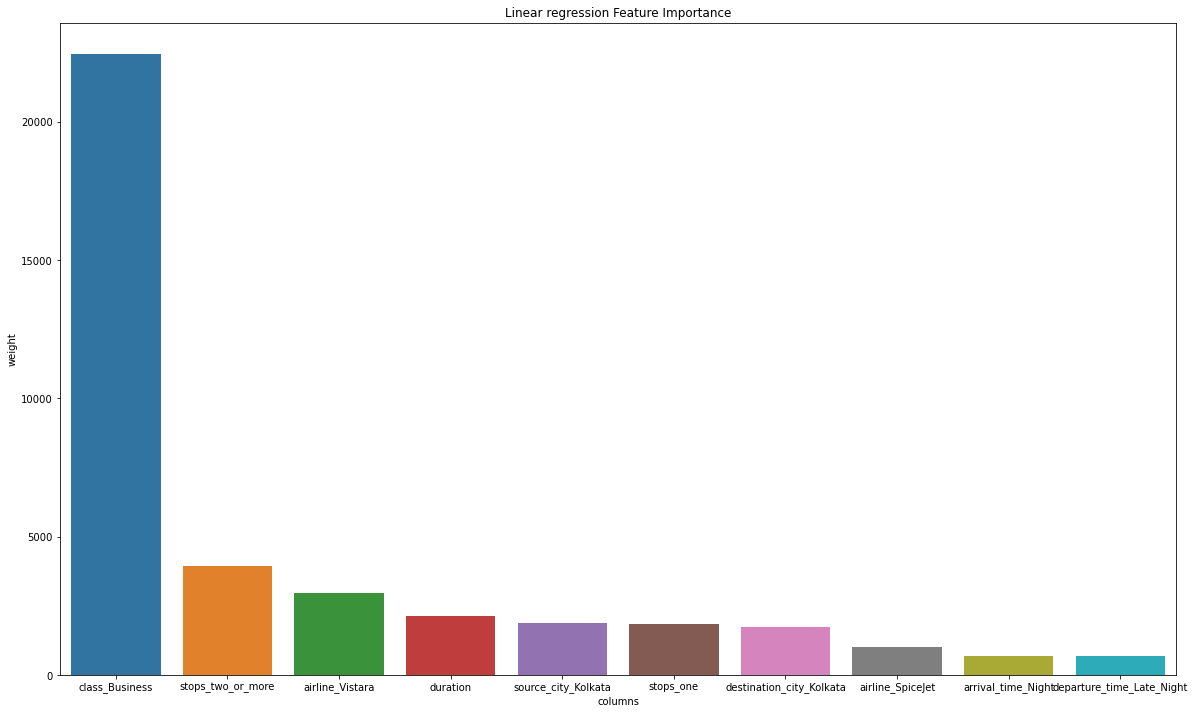

In [127]:
plt.figure(figsize=(20,12))
plt.title('Linear regression Feature Importance')
sns.barplot(data=weights_df.head(10), x='columns', y='weight',);

In [128]:
from xgboost import XGBRegressor

In [129]:
# Create the model
xr1 = XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=42)
# Fit the model
xr1.fit(train_inputs,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=5,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
xr1_train_preds = xr1.predict(train_inputs)
xr1_train_rmse = mean_squared_error(train_targets,xr1_train_preds,squared=False)
xr1_val_preds = xr1.predict(val_inputs)
xr1_val_rmse = mean_squared_error(val_targets,xr1_val_preds,squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(xr1_train_rmse, xr1_val_rmse))

Train RMSE: 2159.510468496356, Validation RMSE: 2482.0463428356625


In [131]:
xr1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xr1.feature_importances_
}).sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

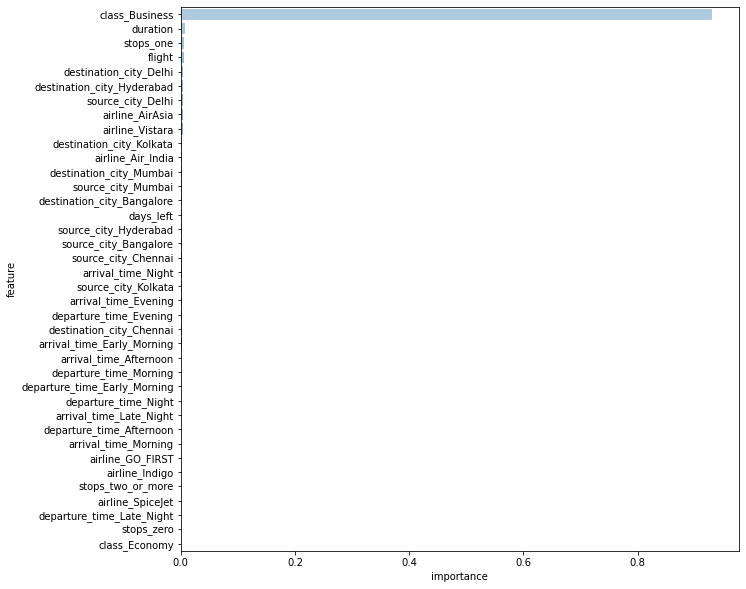

In [132]:
plt.figure(figsize=(10, 10))
sns.barplot(data=xr1_importance_df, x='importance', y='feature',palette="Blues_d",)

In [133]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
rf1 = RandomForestRegressor(random_state=42)
# Fit the model
rf1.fit(train_inputs,train_targets)

RandomForestRegressor(random_state=42)

In [134]:
rf1_train_preds = rf1.predict(train_inputs)
rf1_train_rmse = mean_squared_error(train_targets,rf1_train_preds,squared=False)
rf1_val_preds = rf1.predict(val_inputs)
rf1_val_rmse = mean_squared_error(val_targets,rf1_val_preds,squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 876.4912655539762, Validation RMSE: 2355.1299236626614


In [135]:
rf1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

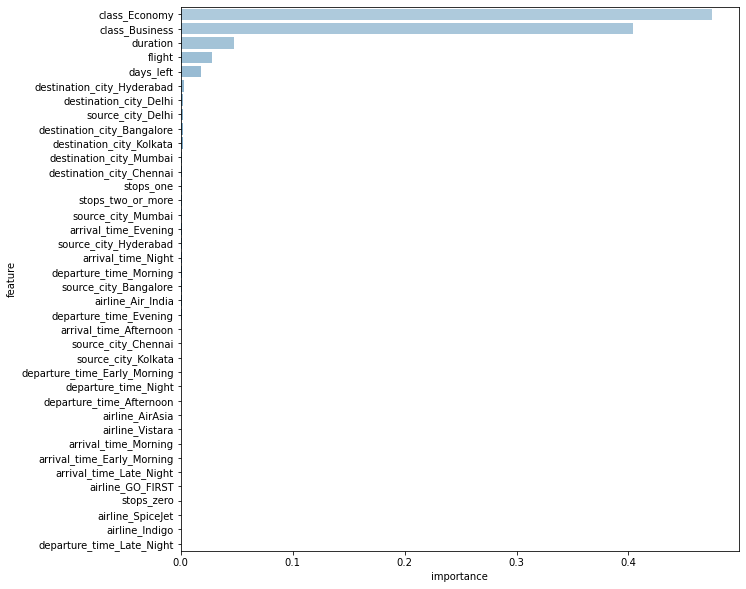

In [136]:
plt.figure(figsize=(10, 10))
sns.barplot(data=rf1_importance_df, x='importance', y='feature',palette="Blues_d",)

In [137]:
# hyper parameter tuning 

In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 60, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [139]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(train_inputs, train_targets)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 60, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [140]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

2541.6892430817193 {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}
2359.111996602431 {'n_estimators': 60, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 23}
2346.312676035523 {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 45}
2591.1748059766946 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
2381.756282093091 {'n_estimators': 60, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 23}
2558.824308981671 {'n_estimators': 60, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
2617.8716739623355 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
2389.395952238483 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 23}
15213.445944122835 {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
2379.024792295497 {'n_estimators': 100, 'min_samples_sp

In [141]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 45}

In [142]:
rf2 = RandomForestRegressor(max_depth=45, max_features='auto', min_samples_split=5,n_estimators=100, random_state=42)
# Train the model
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=45, min_samples_split=5, random_state=42)

In [143]:
rf2_train_preds = rf2.predict(train_inputs)
rf2_train_rmse = mean_squared_error(train_targets,rf2_train_preds,squared=False)
rf2_val_preds = rf2.predict(val_inputs)
rf2_val_rmse = mean_squared_error(val_targets,rf2_val_preds,squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 1287.3219556233416, Validation RMSE: 2326.8857300815407


In [144]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

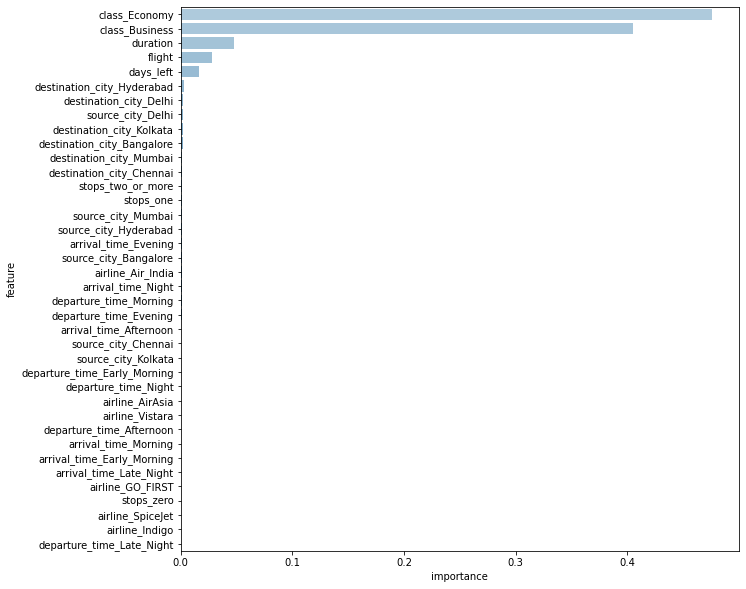

[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=  32.4s
[CV] END max_depth=45, max_features=auto, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=23, max_features=auto, min_samples_split=10, n_estimators=60; total time=  56.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=  32.3s
[CV] END max_depth=23, max_features=auto, min_samples_split=5, n_estimators=60; total time= 1.1min
[CV] END max_depth=23, max_features=auto, min_samples_split=10, n_estimators=60; total time= 1.0min
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=60; total time=  16.3s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=20; total time=   5.0s
[CV] END max_depth=23, max_features=auto, min_samples_split=5, n_estimators=20; total time=  20.0s
[CV] END max_depth=23, max_features=auto, min_samples_split=5, n_estimators=60; total time= 1.1min
[C

In [145]:
plt.figure(figsize=(10, 10))
sns.barplot(data=rf2_importance_df, x='importance', y='feature',palette="Blues_d",)

## All the evaluation metrics

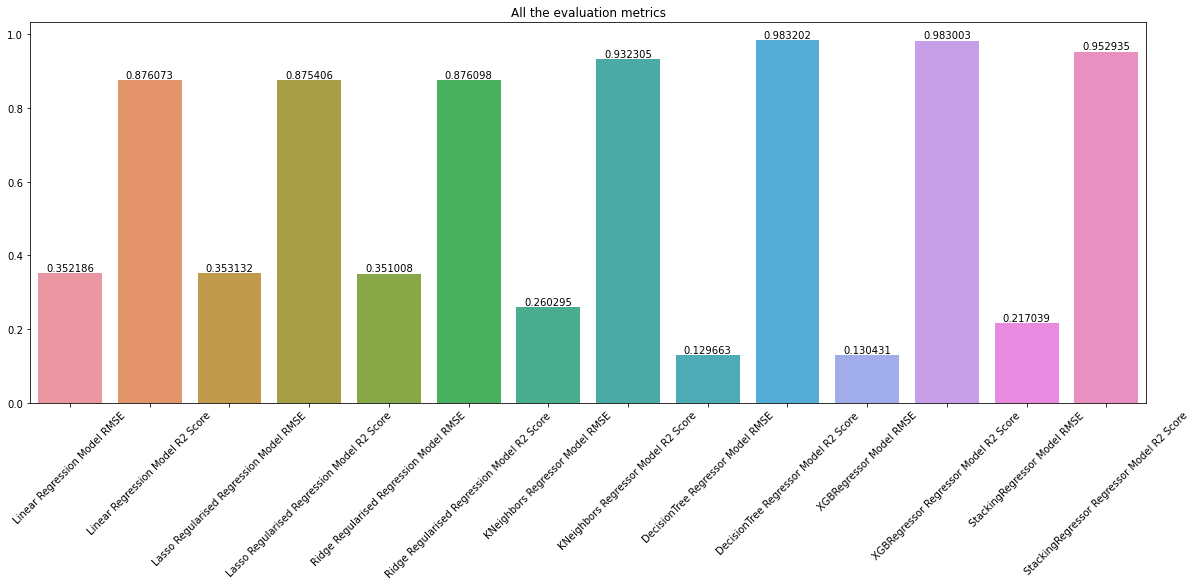

In [183]:
plt.figure(figsize=(20,7))
fig = sns.barplot(data=ModelScore_df)
fig.bar_label(fig.containers[0])
plt.title('All the evaluation metrics')
plt.xticks(rotation=45)
plt.show()

In [170]:
data2= {'Train RMSE': [1287.3219556233416], 'Validation RMSE': [2326.8857300815407]}
model2_df = pd.DataFrame.from_dict(data2)
model2_df

,Train RMSE,Validation RMSE
0,1287.321956,2326.88573


In [ ]:
sns.distplot()